### Context

Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

### Data Discription

The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.


### Data Dictionary

1. brand_name: Name of manufacturing brand
2. os: OS on which the phone runs
3. screen_size: Size of the screen in cm
4. 4g: Whether 4G is available or not
5. 5g: Whether 5G is available or not
6. main_camera_mp: Resolution of the rear camera in megapixels
7. selfie_camera_mp: Resolution of the front camera in megapixels
8. int_memory: Amount of internal memory (ROM) in GB
9. ram: Amount of RAM in GB
10. battery: Energy capacity of the phone battery in mAh
11. weight: Weight of the phone in grams
12. release_year: Year when the phone model was released
13. days_used: Number of days the used/refurbished phone has been used
14. new_price: Price of a new phone of the same model in euros
15. used_price: Price of the used/refurbished phone in euros

### Importing necessary libraries and data

In [1]:
!pip install nb-black

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
# loading the dataset
df = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

### Data Overview

In [4]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

In [5]:
# check number of rows and columns
df.shape

(3571, 15)

<IPython.core.display.Javascript object>

* This dataset has 3571 rows and 15 columns

In [6]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

* There are 3571 rows and 15 columns.
* There are 4 categorical variables and 11 numerical variables 
* Dependent variable is *used_price*.

In [7]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

* main_camera_mp has 180 missing values
* selfie_camera_mp has 2 missing values
* int_memory has 10 missing values
* ram has 10 missing values
* battery has 6 missing values
* weight has 7 missing values

### Exploratory Data Analysis (EDA) on original dataset

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

In [8]:
# making a copy of the original dataset
df1 = df.copy()

<IPython.core.display.Javascript object>

In [9]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


<IPython.core.display.Javascript object>

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

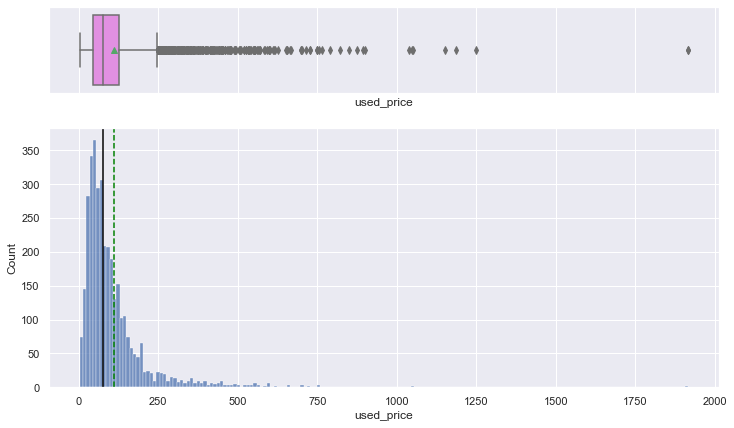

<IPython.core.display.Javascript object>

In [12]:
# create a historam and boxplot of the used price feature
histogram_boxplot(df1, "used_price")

**Observations**

- used_price is right skewed, which means some phones are on the more expensive side
- Mean used price is around 110 euros

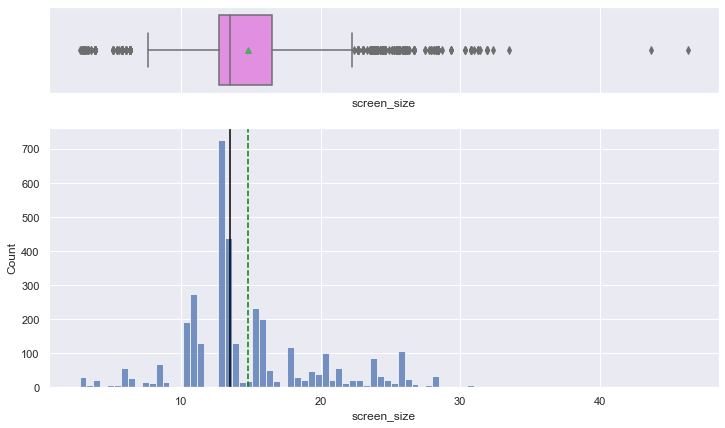

<IPython.core.display.Javascript object>

In [13]:
# create a historam and boxplot of the screen size feature
histogram_boxplot(df1, "screen_size")

**Observations**

- screen_size is slightly right skewed, which means some phones have larger screens
- Mean screen size is around 14.8 cm

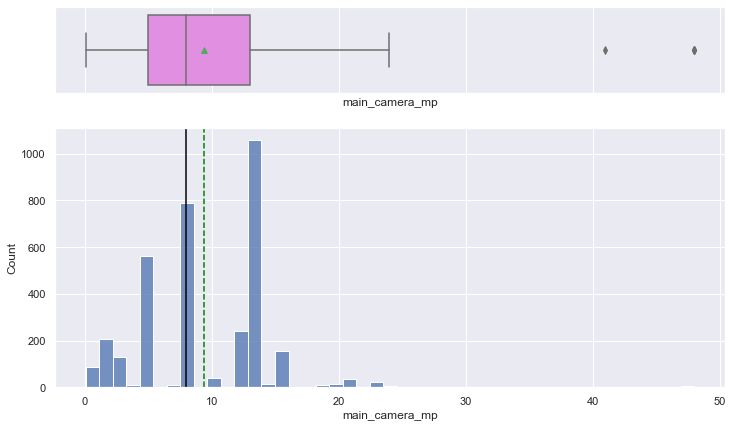

<IPython.core.display.Javascript object>

In [14]:
# create a historam and boxplot of the main camera mp feature
histogram_boxplot(df1, "main_camera_mp")

**Observations**

- distribution is right skewed, which means some phones have higher quality cameras
- Mean main camera mp is around 9.4 mp

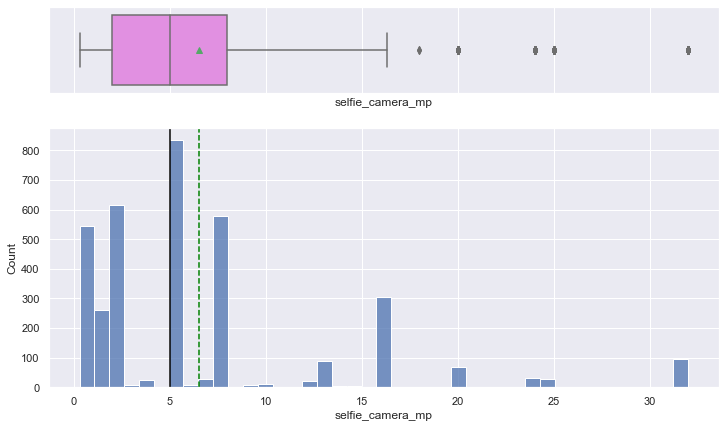

<IPython.core.display.Javascript object>

In [15]:
# create a historam and boxplot of the selfie camera mp feature
histogram_boxplot(df1, "selfie_camera_mp")

**Observations**

- distribution is slightly right skewed, which means some phones have higher quality selfie camers
- Mean selfie camera mp is around 6.54 mp

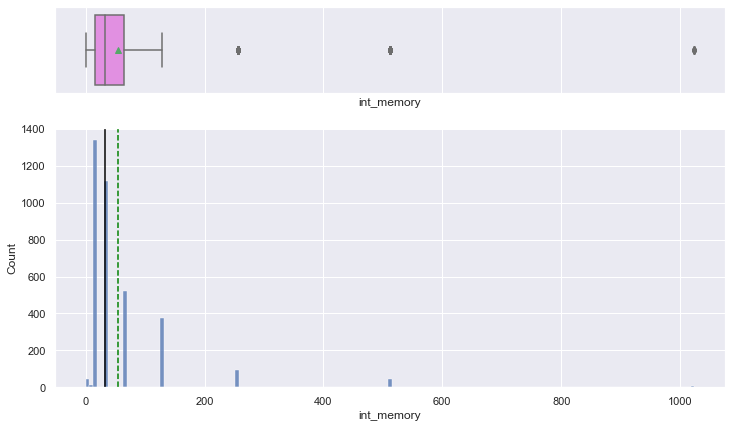

<IPython.core.display.Javascript object>

In [16]:
# create a historam and boxplot of the int memory feature
histogram_boxplot(df1, "int_memory")

**Observations**

- int_memory is slightly right skewed, which means some phones have more int memory
- Mean int memory is 54.53 GB

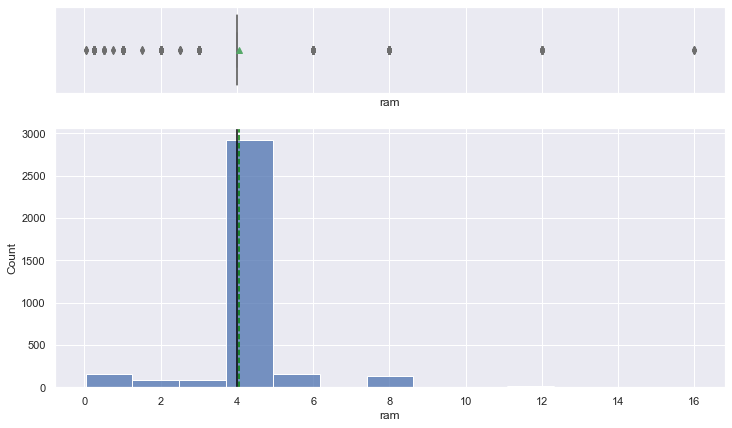

<IPython.core.display.Javascript object>

In [17]:
# create a historam and boxplot of the ram feature
histogram_boxplot(df1, "ram")

**Observations**

- ram is roughly symmetrical as the median and  mean are very close 
- Mean ram is around 4 GB

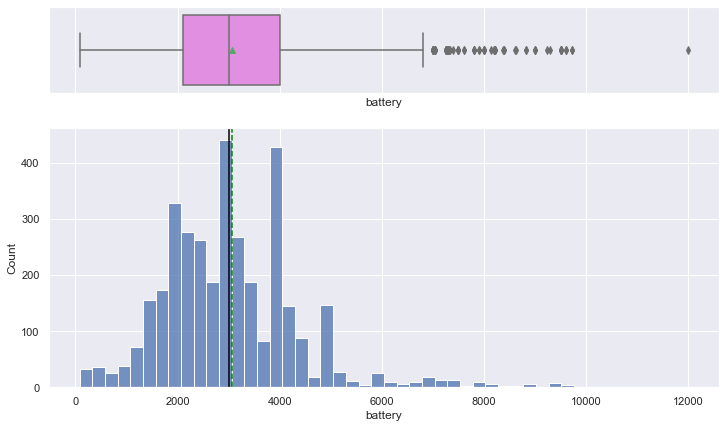

<IPython.core.display.Javascript object>

In [18]:
# create a historam and boxplot of the battery feature
histogram_boxplot(df1, "battery")

**Observations**

- battery is roughly symmetrical with the mean and median being very similar
- Mean battery around 3067 mAh

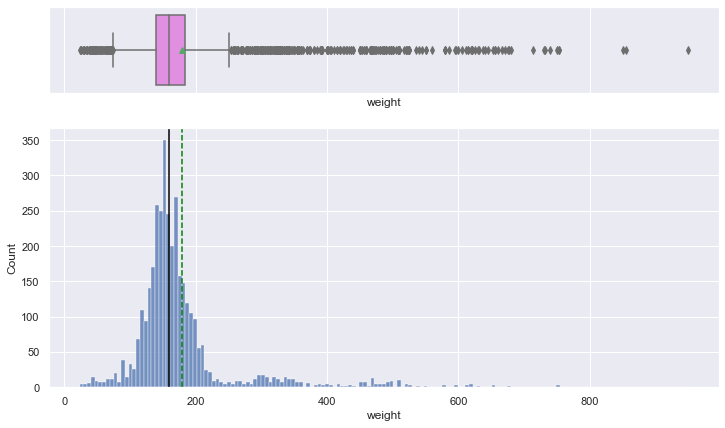

<IPython.core.display.Javascript object>

In [19]:
# create a historam and boxplot of the weight feature
histogram_boxplot(df1, "weight")

**Observations**

- used_price is right skewed, which means some phones are heavier than others
- Mean weight is around 179 grams

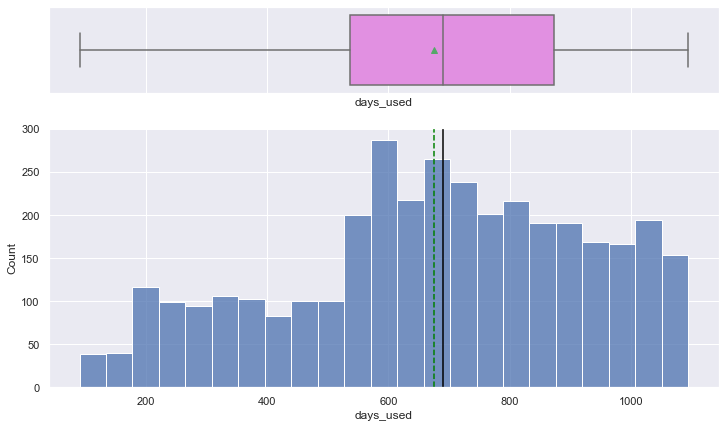

<IPython.core.display.Javascript object>

In [20]:
# create a historam and boxplot of the days used feature
histogram_boxplot(df1, "days_used")

**Observations**

- days_used is slightly left skewed, which means some phones are used less than others
- Mean days used is around 675

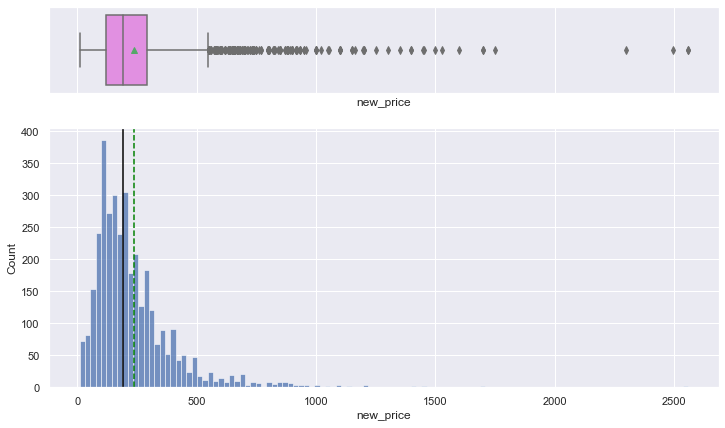

<IPython.core.display.Javascript object>

In [21]:
# create a historam and boxplot of the new price feature
histogram_boxplot(df1, "new_price")

**Observations**

- new_price is slighly right skewed, which means some phones are on the more expensive side
- Mean new price is around 237 euros

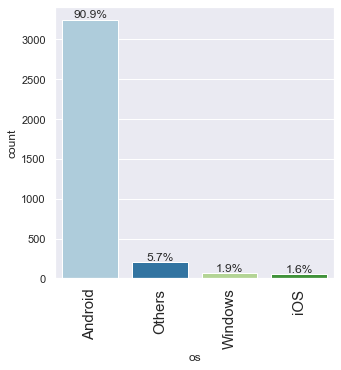

<IPython.core.display.Javascript object>

In [22]:
# create a barplot to see which os is the most present
labeled_barplot(df1, "os", perc=True)

**Observations**

- Anroid is the most presetn os in phones heavily dominating the dataset


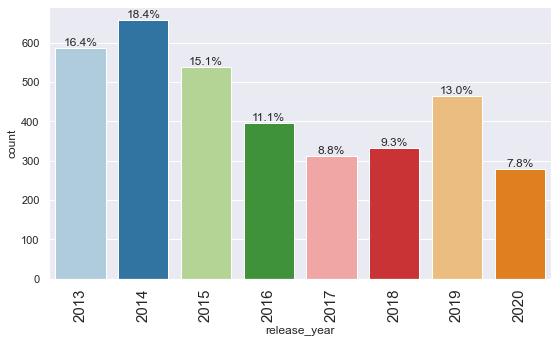

<IPython.core.display.Javascript object>

In [23]:
# create a barplot to the release years of the phones in the dataset
labeled_barplot(df1, "release_year", perc=True)

**Observations**

- The ditribution of phones release year is moderately equal 

In [24]:
# group the data by brand name to compare the mean ram by brand
df1.groupby("brand_name")[["ram"]].mean().sort_values(by="ram", ascending=False)

,ram
brand_name,
OnePlus,6.363636
Oppo,4.961240
Vivo,4.756410
Huawei,4.641326
Honor,4.593220
Xiaomi,4.567164
Google,4.533333
Meizu,4.451613
Realme,4.195122


<IPython.core.display.Javascript object>

**Observations**

- most phones have a ram around 4 GB there are the brands like ONE Plus that has around 6 GB of ram and Celkon has around 1.5 GB of ram

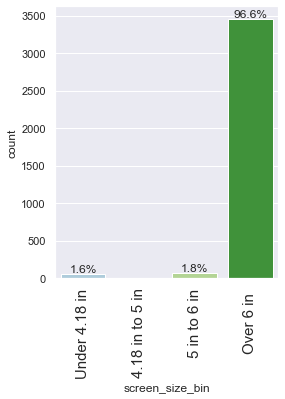

<IPython.core.display.Javascript object>

In [25]:
# creating bins for the screen size and coverting it to inches so that we can see which phone size is most prominent in the dataset
# display size is in inches
binned_ss1 = pd.cut(
    df1["screen_size"], [-np.inf, 10.62 * 0.394, 12.70 * 0.394, 15.24 * 0.394, np.inf]
)
binned_ss1

binned_ss1.value_counts(dropna=False)

# can add custom labels
df1["screen_size_bin"] = pd.cut(
    df1["screen_size"],
    [-np.inf, 10.62 * 0.394, 12.70 * 0.394, 15.24 * 0.394, np.inf],
    labels=["Under 4.18 in", "4.18 in to 5 in", "5 in to 6 in", "Over 6 in "],
)
df1.drop(["screen_size"], axis=1, inplace=True)
df1["screen_size_bin"].value_counts(dropna=False)

labeled_barplot(df1, "screen_size_bin", perc=True)

**Observations**

- Most phones in the dataset have a screen size larger than 6 inches

In [26]:
# checking the variety of phone sizes by brand
cont_table = pd.crosstab(df1["screen_size_bin"], df1["brand_name"])
cont_table.head()

brand_name,Acer,Alcatel,Apple,Asus,BlackBerry,Celkon,Coolpad,Gionee,Google,HTC,...,Others,Panasonic,Realme,Samsung,Sony,Spice,Vivo,XOLO,Xiaomi,ZTE
screen_size_bin,,,,,,,,,,,,,,,,,,,,,
Under 4.18 in,0,2,6,0,0,3,0,0,0,0,...,6,0,0,15,2,0,0,0,0,1
5 in to 6 in,0,5,0,0,0,3,0,0,0,0,...,17,0,0,7,0,0,0,0,0,0
Over 6 in,51,118,53,126,22,31,22,56,15,110,...,486,47,41,342,86,30,117,49,134,140


<IPython.core.display.Javascript object>

In [27]:
# checking how many unique brands are in the dataset
df1["brand_name"].nunique()

34

<IPython.core.display.Javascript object>

**Observations**

- There are 34 unique brands of phones in the dataset

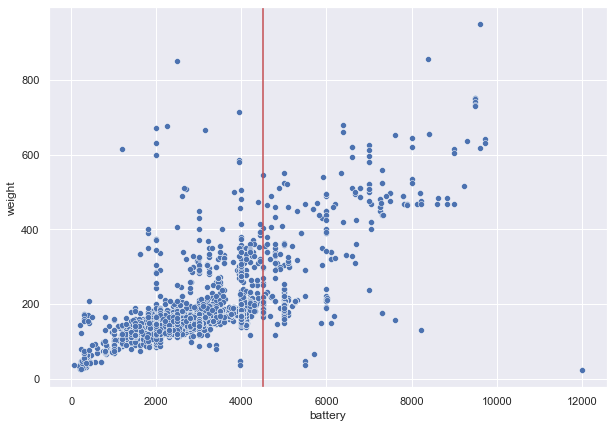

<IPython.core.display.Javascript object>

In [28]:
# creating a scatterplot to compare the weight of a phone and its battery size
plt.figure(figsize=(10, 7))
sns.scatterplot(y="weight", x="battery", data=df1)
battery = 4500
plt.axvline(x=battery, c="r")
plt.show()

**Observations**

- There is a positive association between battery size and weight. Meaning phones with bigger batteries tend to weigh more

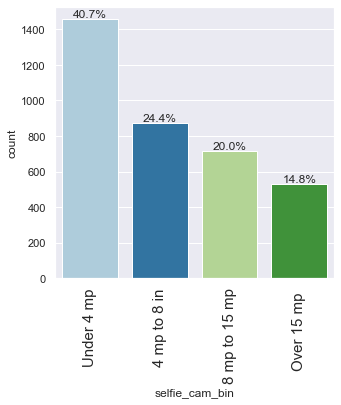

<IPython.core.display.Javascript object>

In [29]:
# created a bin for selfie cam mp so that we can find the most prominent selfie camera size in the dataset
# display size is in inches
binned_ss1 = pd.cut(df1["selfie_camera_mp"], [-np.inf, 4, 8, 15, np.inf])
binned_ss1

binned_ss1.value_counts(dropna=False)

# can add custom labels
df1["selfie_cam_bin"] = pd.cut(
    df1["selfie_camera_mp"],
    [-np.inf, 4, 7, 15, np.inf],
    labels=["Under 4 mp", "4 mp to 8 in", "8 mp to 15 mp", "Over 15 mp "],
)
df1.drop(["selfie_camera_mp"], axis=1, inplace=True)
df1["selfie_cam_bin"].value_counts(dropna=False)

labeled_barplot(df1, "selfie_cam_bin", perc=True)

**Observations**

- Majority of phones have a lower quality selfie camera under 4 mp but around 35% of the phones in the data set have phones with good cameras

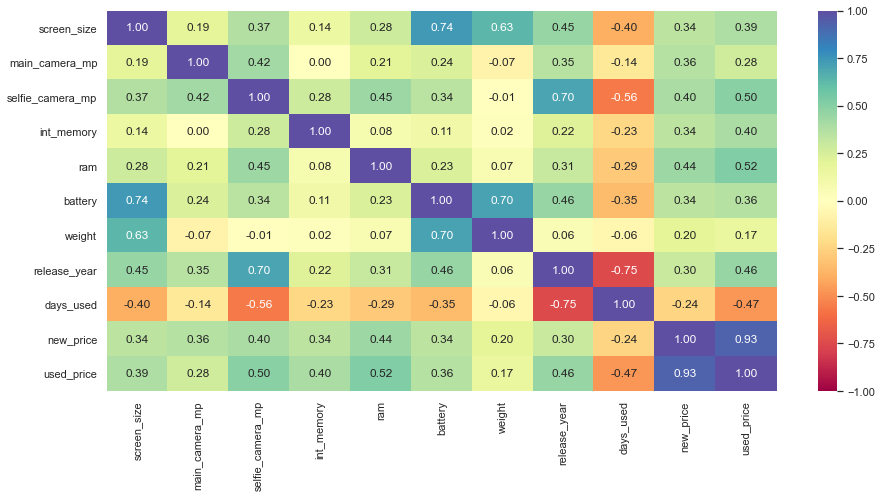

<IPython.core.display.Javascript object>

In [30]:
# creating a heatmap to see the correlation of all variables for the original dataset
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

**Observations**

- Selfie camera mp, int memory, ram, release year, and new price all have moderately strong correlations to the dependent variable used price


### Data Preprocessing

In [31]:
# checking for data type and non-null values in the dataset with the binned features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   brand_name       3571 non-null   object  
 1   os               3571 non-null   object  
 2   4g               3571 non-null   object  
 3   5g               3571 non-null   object  
 4   main_camera_mp   3391 non-null   float64 
 5   int_memory       3561 non-null   float64 
 6   ram              3561 non-null   float64 
 7   battery          3565 non-null   float64 
 8   weight           3564 non-null   float64 
 9   release_year     3571 non-null   int64   
 10  days_used        3571 non-null   int64   
 11  new_price        3571 non-null   float64 
 12  used_price       3571 non-null   float64 
 13  screen_size_bin  3571 non-null   category
 14  selfie_cam_bin   3569 non-null   category
dtypes: category(2), float64(7), int64(2), object(4)
memory usage: 370.2+ KB


<IPython.core.display.Javascript object>

In [32]:
# checking for the amount of rows that have a certain amount of missing values
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    3368
1     193
2       8
3       2
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- 3368 rows have no missing data
- 193 rows have exactly one missing value
- 8 rows have exactly 2 missing values
- 2 rows have exactly 3 missing values

In [33]:
# checking to see what the rows are that have exactly 1,2,or 3 missing value
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
main_camera_mp      180
selfie_camera_mp      2
battery               4
weight                7
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
int_memory    8
ram           8
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
int_memory    2
ram           2
battery       2
dtype: int64





<IPython.core.display.Javascript object>

**Observations**

- There does not seem to be any pattern to the missing values

### Creating a dataset with no missing values 

In [34]:
# creating a copy of the previous dataset
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [35]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
df2["selfie_cam_bin"] = (
    df2["selfie_cam_bin"].astype(str).replace("nan", "is_missing").astype("category")
)

<IPython.core.display.Javascript object>

In [36]:
# filling all missing values with the median
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()
df2[numeric_columns] = df2[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [37]:
# dropping the rows that have missing values in the selfie cam bin feature
df2.dropna(subset=["selfie_cam_bin"], inplace=True)

<IPython.core.display.Javascript object>

### Data Overview

In [38]:
# checking for amount of rows and columns in the dataset
df2.shape

(3569, 15)

<IPython.core.display.Javascript object>

**Observations**

- There are 3569 rows and 15 columns there are two less columns as those are the ones with missing values after filling all other missing values with the median and dropping the selfie camera bin rows that were missing

In [39]:
# checking for the data types and non-null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   brand_name       3569 non-null   object  
 1   os               3569 non-null   object  
 2   4g               3569 non-null   object  
 3   5g               3569 non-null   object  
 4   main_camera_mp   3569 non-null   float64 
 5   int_memory       3569 non-null   float64 
 6   ram              3569 non-null   float64 
 7   battery          3569 non-null   float64 
 8   weight           3569 non-null   float64 
 9   release_year     3569 non-null   int64   
 10  days_used        3569 non-null   int64   
 11  new_price        3569 non-null   float64 
 12  used_price       3569 non-null   float64 
 13  screen_size_bin  3569 non-null   category
 14  selfie_cam_bin   3569 non-null   category
dtypes: category(2), float64(7), int64(2), object(4)
memory usage: 397.7+ KB


<IPython.core.display.Javascript object>

In [40]:
# checking the number of missing values
df2.isnull().sum()

brand_name         0
os                 0
4g                 0
5g                 0
main_camera_mp     0
int_memory         0
ram                0
battery            0
weight             0
release_year       0
days_used          0
new_price          0
used_price         0
screen_size_bin    0
selfie_cam_bin     0
dtype: int64

<IPython.core.display.Javascript object>

**Observations**

- There is now no more missing values

### EDA on dataset with no missing values

In [41]:
# checking the statistics for the dataset
df2.describe()

,main_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000,3569.000000
mean,9.328254,54.464168,4.056834,3067.053656,179.391748,2015.963855,675.518072,237.015214,109.688369
std,4.706169,84.609327,1.390286,1363.428629,90.220540,2.291920,248.652375,196.964155,121.262661
min,0.080000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000
25%,5.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,537.000000,120.130000,45.200000
50%,8.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.770000,75.520000
75%,13.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.500000,125.750000
max,48.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000


<IPython.core.display.Javascript object>

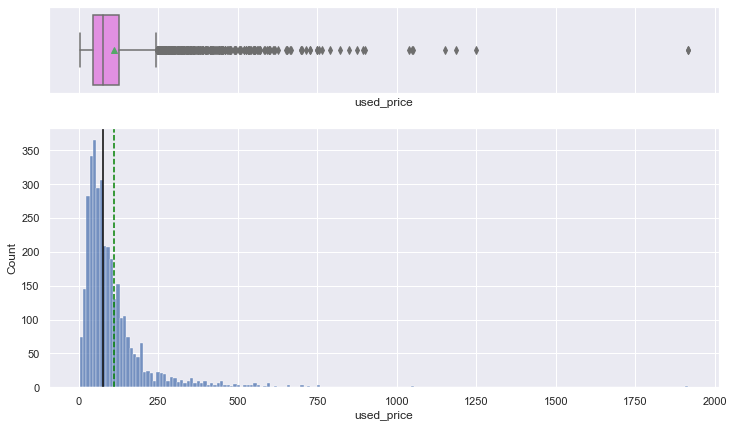

<IPython.core.display.Javascript object>

In [42]:
# create a historam and boxplot of the used price feature
histogram_boxplot(df2, "used_price")

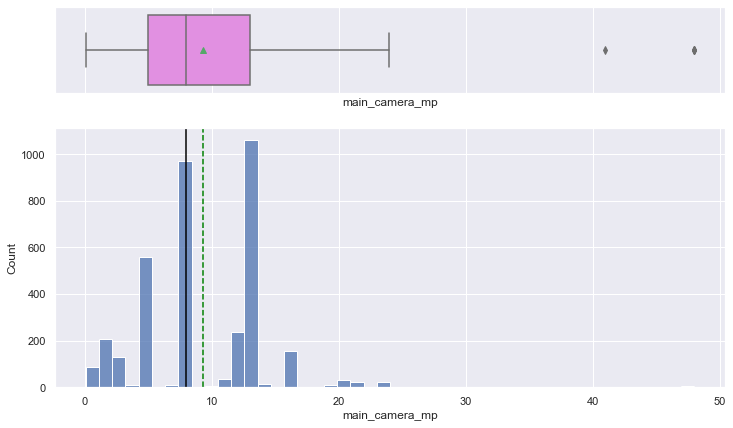

<IPython.core.display.Javascript object>

In [43]:
# create a historam and boxplot of the main camera mp feature
histogram_boxplot(df2, "main_camera_mp")

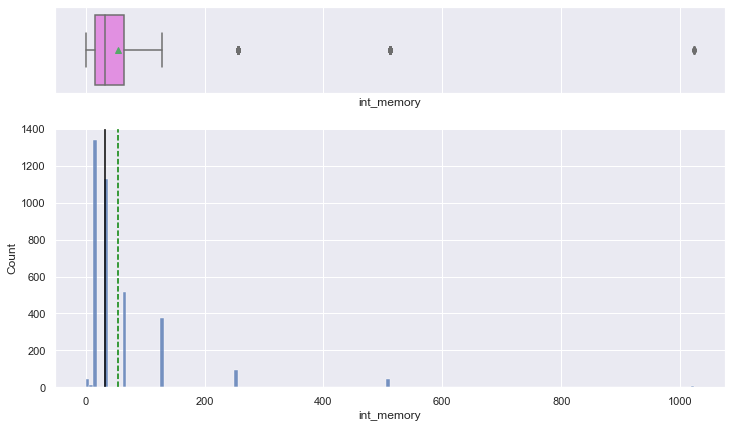

<IPython.core.display.Javascript object>

In [44]:
# create a historam and boxplot of the int memory feature
histogram_boxplot(df2, "int_memory")

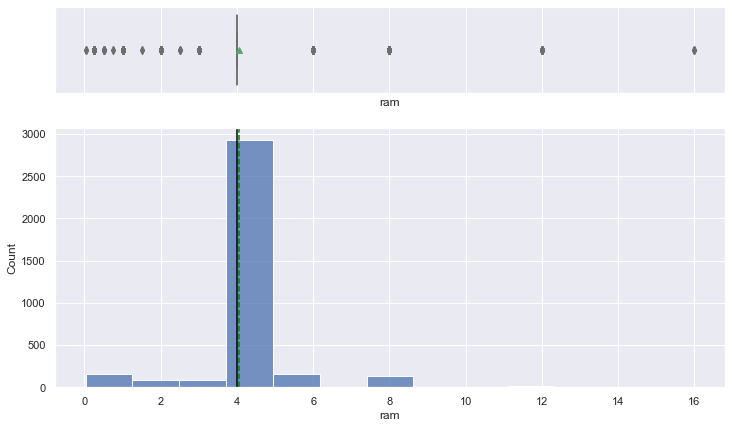

<IPython.core.display.Javascript object>

In [45]:
# create a historam and boxplot of the ram feature
histogram_boxplot(df2, "ram")

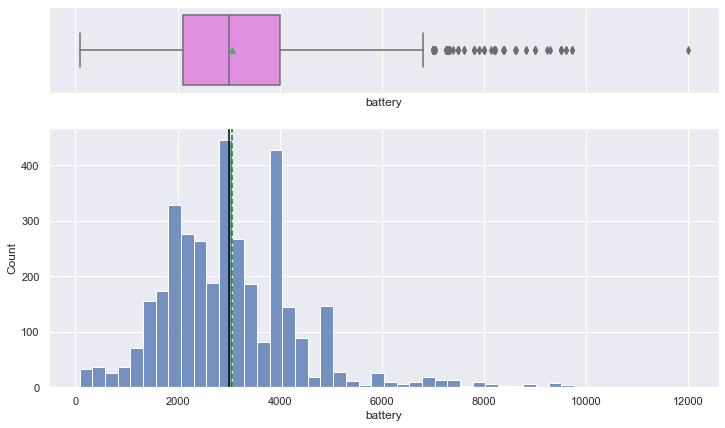

<IPython.core.display.Javascript object>

In [46]:
# create a historam and boxplot of the battery feature
histogram_boxplot(df2, "battery")

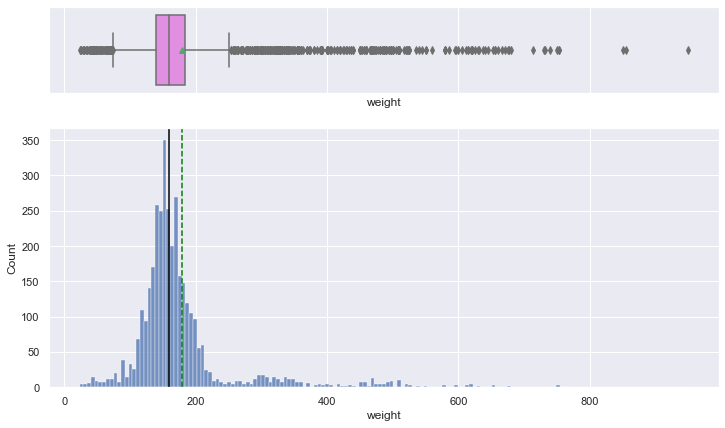

<IPython.core.display.Javascript object>

In [47]:
# create a historam and boxplot of the weight feature
histogram_boxplot(df2, "weight")

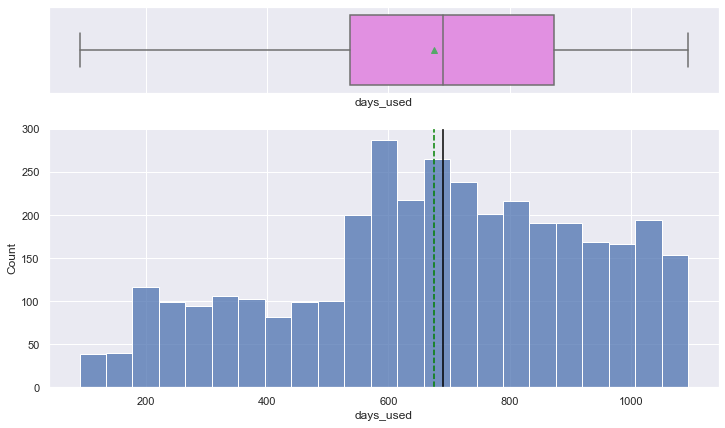

<IPython.core.display.Javascript object>

In [48]:
# create a historam and boxplot of the days used feature
histogram_boxplot(df2, "days_used")

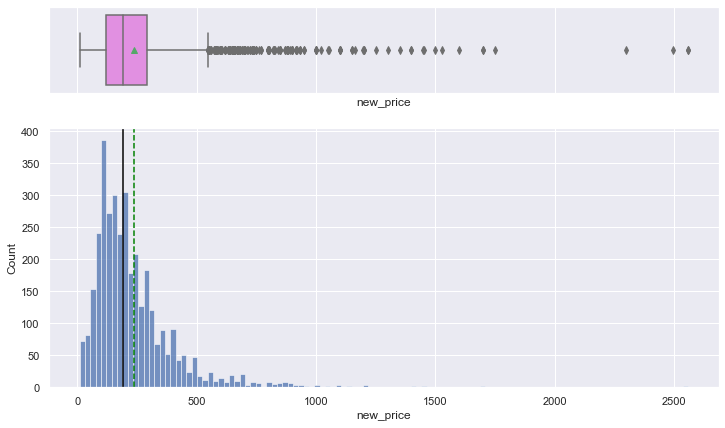

<IPython.core.display.Javascript object>

In [49]:
# create a historam and boxplot of the new price feature
histogram_boxplot(df2, "new_price")

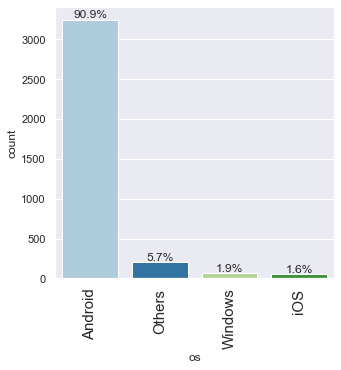

<IPython.core.display.Javascript object>

In [50]:
# creating a barplot of the os feature to see the most present os in the dataset
labeled_barplot(df2, "os", perc=True)

**Observations**

- After dealing with missing values android os still dominates the phones in the dataset

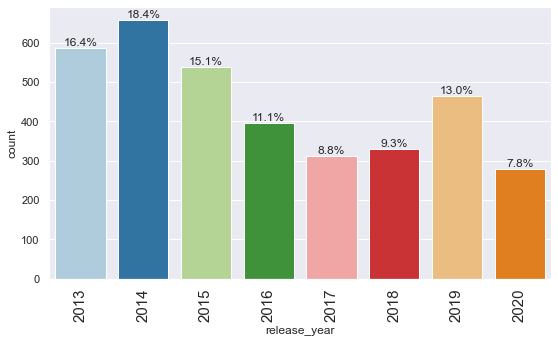

<IPython.core.display.Javascript object>

In [51]:
# creating a barplot for release yar
labeled_barplot(df2, "release_year", perc=True)

**Observations**

- After dealing with missing values the distribution of relase year is still roughly equal 

In [52]:
# grouped the data by brand name to see the mean amount of ram by brand
df2.groupby("brand_name")[["ram"]].mean().sort_values(by="ram", ascending=False)

,ram
brand_name,
OnePlus,6.363636
Oppo,4.961240
Vivo,4.756410
Huawei,4.641326
Google,4.615385
Honor,4.593220
Xiaomi,4.567164
Meizu,4.451613
Realme,4.195122


<IPython.core.display.Javascript object>

**Observations**

- After dealing with missing values all phone brands still have ram within 3 and 4 GB

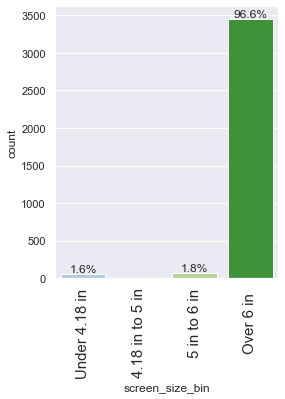

<IPython.core.display.Javascript object>

In [53]:
# created a barplot to see which screen size is most present in the dataset
labeled_barplot(df2, "screen_size_bin", perc=True)

**Observations**

- After dealing with missing values most phones in  the dataset have screens larger than 6 inches

In [54]:
# created a contingincy table to see the screen size by brand breakdown
cont_table1 = pd.crosstab(df2["screen_size_bin"], df2["brand_name"])
cont_table1.head()

brand_name,Acer,Alcatel,Apple,Asus,BlackBerry,Celkon,Coolpad,Gionee,Google,HTC,...,Others,Panasonic,Realme,Samsung,Sony,Spice,Vivo,XOLO,Xiaomi,ZTE
screen_size_bin,,,,,,,,,,,,,,,,,,,,,
Under 4.18 in,0,2,6,0,0,3,0,0,0,0,...,6,0,0,15,2,0,0,0,0,1
5 in to 6 in,0,5,0,0,0,3,0,0,0,0,...,17,0,0,7,0,0,0,0,0,0
Over 6 in,51,118,53,126,22,31,22,56,13,110,...,486,47,41,342,86,30,117,49,134,140


<IPython.core.display.Javascript object>

In [55]:
# checking the amount of unique brand names in the dataset
df2["brand_name"].nunique()

34

<IPython.core.display.Javascript object>

**Observations**

- After dealing with missing values there are still 34 unique brands in the dataset

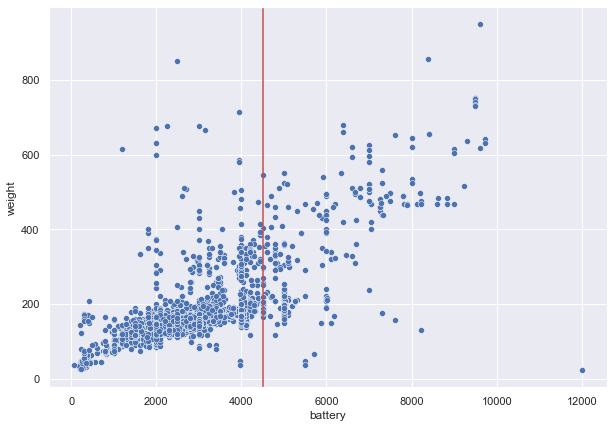

<IPython.core.display.Javascript object>

In [56]:
# created a scatterplot to compare the weight of a phone and its battery size
plt.figure(figsize=(10, 7))
sns.scatterplot(y="weight", x="battery", data=df2)
battery = 4500
plt.axvline(x=battery, c="r")
plt.show()

**Observations**

- After dealing with missing value there is a still a positive association between battery and weight

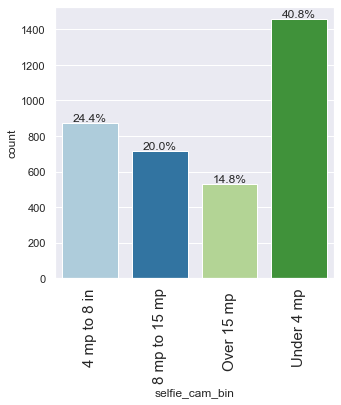

<IPython.core.display.Javascript object>

In [57]:
# created a barplot to see the most present selfie cam size
labeled_barplot(df2, "selfie_cam_bin", perc=True)

**Observations**

- After dealing with missing values most phones have selfie cameras mp under 4

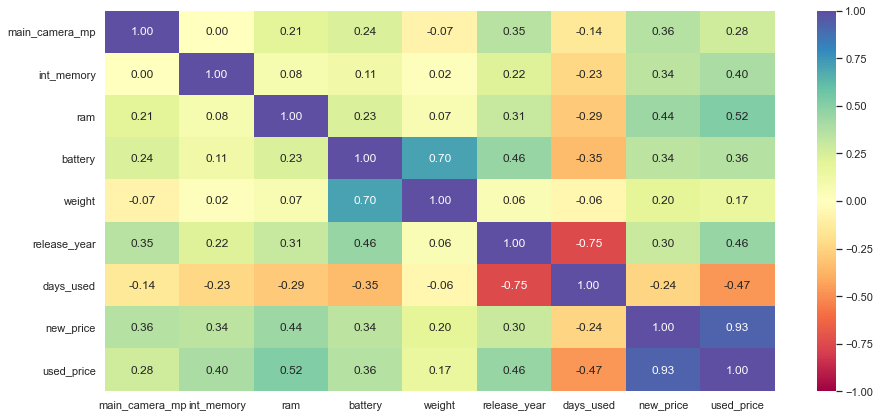

<IPython.core.display.Javascript object>

In [58]:
# created a heat map to see the correlation of all the features
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

- After dealing with missing values int memory, ram, release year, days used, and new price still are the variables with the most correlation to the dependent variable used price

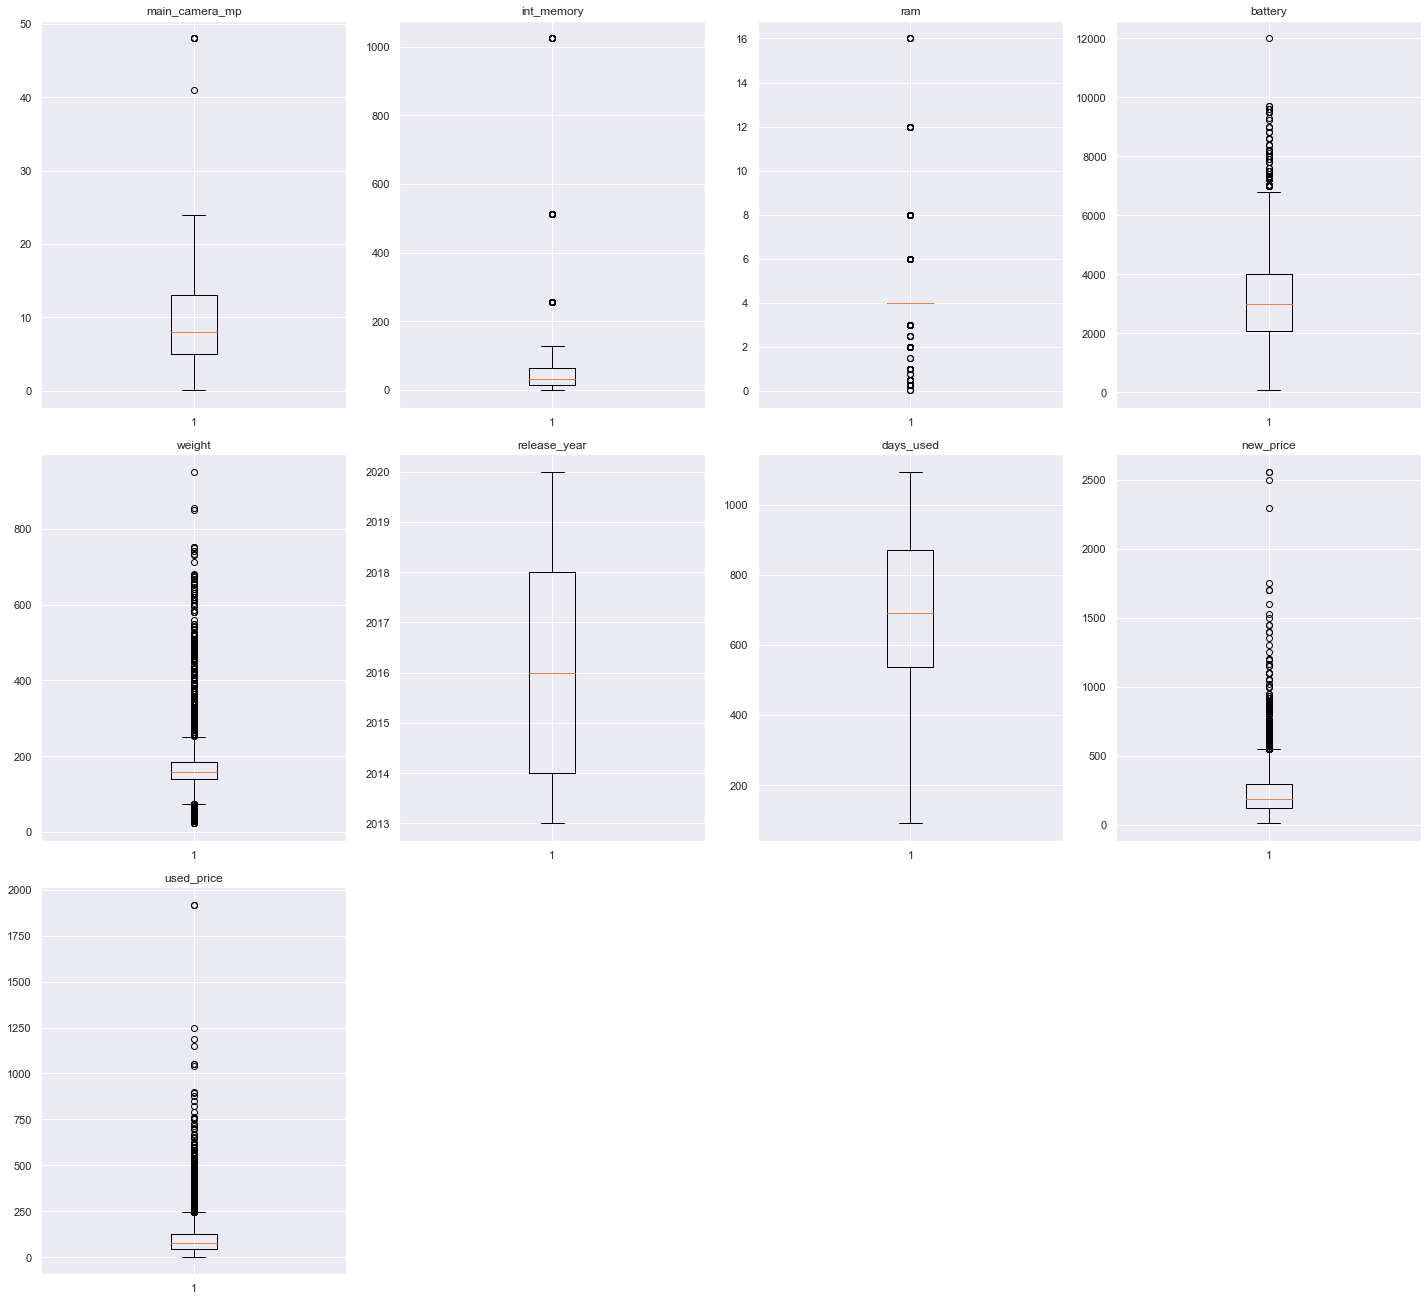

<IPython.core.display.Javascript object>

In [59]:
# created the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- All variables except release year and days used have missing values.
- However it may make sense for some of these outliers as some times premire brands charge a lot for phones
- I am going to create a model including these outliers as well as one with no outliers so that we can compare and choose the best model

### Building a Linear Regression model with no missing values and outliers included

In [60]:
# defining X and y variables
X = df2.drop(["used_price"], axis=1)
y = df2["used_price"]

print(X.head())
print(y.head())

  brand_name       os   4g   5g  main_camera_mp  int_memory  ram  battery  \
0      Honor  Android  yes   no            13.0        64.0  3.0   3020.0   
1      Honor  Android  yes  yes            13.0       128.0  8.0   4300.0   
2      Honor  Android  yes  yes            13.0       128.0  8.0   4200.0   
3      Honor  Android  yes  yes            13.0        64.0  6.0   7250.0   
4      Honor  Android  yes   no            13.0        64.0  3.0   5000.0   

   weight  release_year  days_used  new_price screen_size_bin selfie_cam_bin  
0   146.0          2020        127     111.62      Over 6 in    4 mp to 8 in  
1   213.0          2020        325     249.39      Over 6 in     Over 15 mp   
2   213.0          2020        162     359.47      Over 6 in   8 mp to 15 mp  
3   480.0          2020        345     278.93      Over 6 in   8 mp to 15 mp  
4   185.0          2020        293     140.87      Over 6 in   8 mp to 15 mp  
0     86.96
1    161.49
2    268.55
3    180.23
4    103.80
Nam

<IPython.core.display.Javascript object>

In [61]:
# creating dummy variables for the oject and category type variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,main_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,brand_name_Alcatel,brand_name_Apple,...,os_Windows,os_iOS,4g_yes,5g_yes,screen_size_bin_4.18 in to 5 in,screen_size_bin_5 in to 6 in,screen_size_bin_Over 6 in,selfie_cam_bin_8 mp to 15 mp,selfie_cam_bin_Over 15 mp,selfie_cam_bin_Under 4 mp
0,13.0,64.0,3.0,3020.0,146.0,2020,127,111.62,0,0,...,0,0,1,0,0,0,1,0,0,0
1,13.0,128.0,8.0,4300.0,213.0,2020,325,249.39,0,0,...,0,0,1,1,0,0,1,0,1,0
2,13.0,128.0,8.0,4200.0,213.0,2020,162,359.47,0,0,...,0,0,1,1,0,0,1,1,0,0
3,13.0,64.0,6.0,7250.0,480.0,2020,345,278.93,0,0,...,0,0,1,1,0,0,1,1,0,0
4,13.0,64.0,3.0,5000.0,185.0,2020,293,140.87,0,0,...,0,0,1,0,0,0,1,1,0,0


<IPython.core.display.Javascript object>

**Observations**

- Dummy variables were created for brand name, 4g or 5 g, screen size bin, and selfie cam bin

In [62]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [63]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2498
Number of rows in test data = 1071


<IPython.core.display.Javascript object>

### Building a linear model using sklearn

In [64]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [65]:
# printing the coefficents of each variable in the model
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
main_camera_mp,-1.575223e+00
int_memory,5.402235e-02
ram,3.478919e+00
battery,-1.561846e-04
weight,-4.217530e-02
release_year,3.997535e+00
days_used,-1.001518e-01
new_price,5.437488e-01
brand_name_Alcatel,4.045894e+00
brand_name_Apple,1.514887e+02


<IPython.core.display.Javascript object>

In [66]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [67]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,27.260404,16.620577,0.951878,0.950855,27.945701


<IPython.core.display.Javascript object>

In [68]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.181883,17.214297,0.938731,0.935601,29.017818


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 95.2%, indicating that the model explains 95.2% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used price within a mean error of 17.2 euros on the test data.

- MAPE on the test set suggests we can predict within 29% of the used price.

### Building a linear model using statsmodels

In [69]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     948.7
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:08:28   Log-Likelihood:                -11801.
No. Observations:                2498   AIC:                         2.371e+04
Df Residuals:                    2446   BIC:                         2.401e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *used price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

### Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [71]:
# checking the vif scores of all the variables
checking_vif(x_train1)

,feature,VIF
0,const,4.104567e+06
1,main_camera_mp,2.177848e+00
2,int_memory,1.354246e+00
3,ram,1.802470e+00
4,battery,3.634988e+00
5,weight,2.721910e+00
6,release_year,5.314081e+00
7,days_used,2.599385e+00
8,new_price,2.103068e+00
9,brand_name_Alcatel,3.111071e+00


<IPython.core.display.Javascript object>

**Observations**

-  release_year, brand_name_Huawei, brand_name_LG, brand_name_Others, brand_name_Samsung, brand_name_Apple
    os_iOS, screen_size_bin_4.18 in to 5 in, screen_size_bin_5 in to 6 in, screen_size_bin_Over 6 in are the variables that will need a closer look as they have high VIF scores or in the case of the screen size bin are leading to a nan score

In [72]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [73]:
# checking to see the impact on adj r2 if we were to drop these variables
col_list = [
    "release_year",
    "brand_name_Huawei",
    "brand_name_LG",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Apple",
    "os_iOS",
    "screen_size_bin_4.18 in to 5 in",
    "screen_size_bin_5 in to 6 in",
    "screen_size_bin_Over 6 in",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.950895,27.543021
1,brand_name_LG,0.950894,27.543149
2,brand_name_Huawei,0.950894,27.543257
3,screen_size_bin_4.18 in to 5 in,0.950875,27.548647
4,brand_name_Samsung,0.950868,27.550477
5,screen_size_bin_5 in to 6 in,0.950864,27.551743
6,screen_size_bin_Over 6 in,0.950707,27.595660
7,release_year,0.949846,27.835515
8,brand_name_Apple,0.949832,27.839340
9,os_iOS,0.949110,28.039213


<IPython.core.display.Javascript object>

**Observations**

- the chart above shows the impact that having that certain variable will have on the adjusted r2 and rmse 

In [74]:
# dropping the brand name others variable to check the impact it had on the other variables vif scores
col_to_drop = "brand_name_Others"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,4.103656e+06
1,main_camera_mp,2.177847e+00
2,int_memory,1.353941e+00
3,ram,1.801790e+00
4,battery,3.632957e+00
5,weight,2.721676e+00
6,release_year,5.312160e+00
7,days_used,2.599273e+00
8,new_price,2.102997e+00
9,brand_name_Alcatel,1.180063e+00


<IPython.core.display.Javascript object>

In [75]:
# checking to see the impact on adj r2 if we were to drop these variables
col_list = [
    "release_year",
    "brand_name_Apple",
    "os_iOS",
    "screen_size_bin_4.18 in to 5 in",
    "screen_size_bin_5 in to 6 in",
    "screen_size_bin_Over 6 in",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size_bin_4.18 in to 5 in,0.950895,27.543021
1,screen_size_bin_5 in to 6 in,0.950884,27.546125
2,screen_size_bin_Over 6 in,0.950727,27.590025
3,release_year,0.949866,27.829977
4,brand_name_Apple,0.949804,27.847259
5,os_iOS,0.949130,28.033505


<IPython.core.display.Javascript object>

In [76]:
# dropping this variable to check the impact it has on the others vif scores
col_to_drop = "screen_size_bin_4.18 in to 5 in"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size_bin_4.18 in to 5 in


,feature,VIF
0,const,4.103656e+06
1,main_camera_mp,2.177847e+00
2,int_memory,1.353941e+00
3,ram,1.801790e+00
4,battery,3.632957e+00
5,weight,2.721676e+00
6,release_year,5.312160e+00
7,days_used,2.599273e+00
8,new_price,2.102997e+00
9,brand_name_Alcatel,1.180063e+00


<IPython.core.display.Javascript object>

In [77]:
# checking to see the impact on adj r2 if we were to drop these variables
col_list = ["brand_name_Apple", "os_iOS", "release_year"]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year,0.949866,27.829977
1,brand_name_Apple,0.949804,27.847259
2,os_iOS,0.949130,28.033505


<IPython.core.display.Javascript object>

In [78]:
col_to_drop = "release_year"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,130.830528
1,main_camera_mp,2.137039
2,int_memory,1.350525
3,ram,1.801494
4,battery,3.521474
5,weight,2.709691
6,days_used,1.881024
7,new_price,2.069433
8,brand_name_Alcatel,1.179047
9,brand_name_Apple,22.441997


<IPython.core.display.Javascript object>

In [79]:
# checking to see the impact on adj r2 if we were to drop these variables
col_list = ["brand_name_Apple", "os_iOS"]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.948639,28.168605
1,os_iOS,0.948007,28.341236


<IPython.core.display.Javascript object>

In [80]:
# dropping this variable to check the impact on the other variables vif scores
col_to_drop = "brand_name_Apple"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,130.165363
1,main_camera_mp,2.135821
2,int_memory,1.350291
3,ram,1.797024
4,battery,3.518181
5,weight,2.701614
6,days_used,1.875850
7,new_price,2.051754
8,brand_name_Alcatel,1.178538
9,brand_name_Asus,1.216149


<IPython.core.display.Javascript object>

**Observations**

- After dropping the variables brand name other, brand name apple, release year, and screen size bin 4.18 to 5 in there are no more variables with a vif score higer than 5 and no multicollinearity is now satisfied

In [81]:
# creating a linear model with all the features that did not violate multicollinearity
olsmod1 = sm.OLS(y_train, x_train5).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     961.8
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:08:35   Log-Likelihood:                -11859.
No. Observations:                2498   AIC:                         2.382e+04
Df Residuals:                    2449   BIC:                         2.410e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

**Observations**

- The models adjusted r2 value dropped from .952 to .949 which shows the dropped variables did not have much effect on the model
- Now we need to drop the vairables that have high p-values (greater than .05)

In [82]:
# initial list of columns
cols = x_train5.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train5[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'int_memory', 'ram', 'weight', 'days_used', 'new_price', 'brand_name_Gionee', 'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Vivo', 'os_Others', 'os_iOS', '4g_yes', '5g_yes', 'screen_size_bin_Over 6 in ']


<IPython.core.display.Javascript object>

In [83]:
# train set and test set that have the features with a p-value <.05
x_train6 = x_train5[selected_features]
x_test6 = x_test5[selected_features]

<IPython.core.display.Javascript object>

In [84]:
# creating a linear model with all the features that did not violate multicollinearity and a p-value <.05
olsmod2 = sm.OLS(y_train, x_train6).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     2558.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:08:37   Log-Likelihood:                -11876.
No. Observations:                2498   AIC:                         2.379e+04
Df Residuals:                    2479   BIC:                         2.390e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train6* as the final ones and *olsmod2* as final model.**

**Observations**

- The models adjusted r2 value is 94.9% which shows that our model is good

In [85]:
# created a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3110,26.81,8.665764,18.144236
2192,20.49,0.766061,19.723939
1043,39.22,52.269041,-13.049041
1458,36.59,29.895431,6.694569
1490,30.23,18.489068,11.740932


<IPython.core.display.Javascript object>

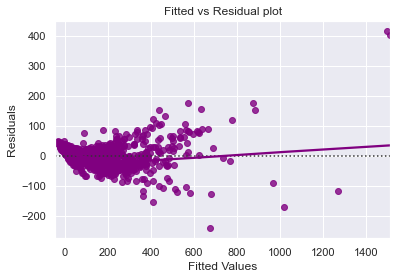

<IPython.core.display.Javascript object>

In [86]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

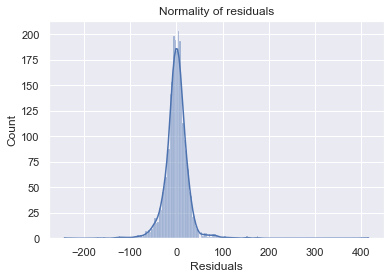

<IPython.core.display.Javascript object>

In [87]:
# plot to check for normaility of the residuals
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

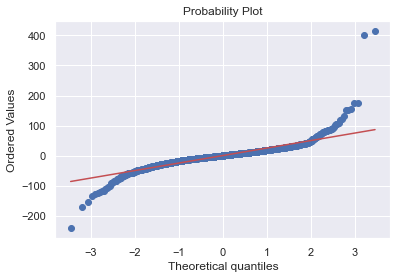

<IPython.core.display.Javascript object>

In [88]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [89]:
# running a shapiro test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.795386552810669, pvalue=0.0)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

In [90]:
# running a goldfelduandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train6)
lzip(name, test)

[('F statistic', 0.5938255011831955), ('p-value', 0.9999999999999999)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [91]:
# predictions on the test set
pred = olsmod2.predict(x_test6)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1337,49.64,52.440536
3152,51.56,23.601052
351,335.09,339.846266
560,20.59,8.580339
854,68.65,76.433600
3021,51.92,57.773127
1032,152.36,178.102010
219,40.18,41.978074
876,35.92,48.216423
1963,27.02,-1.570150


<IPython.core.display.Javascript object>

- We can observe here that our model has returned fairly good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

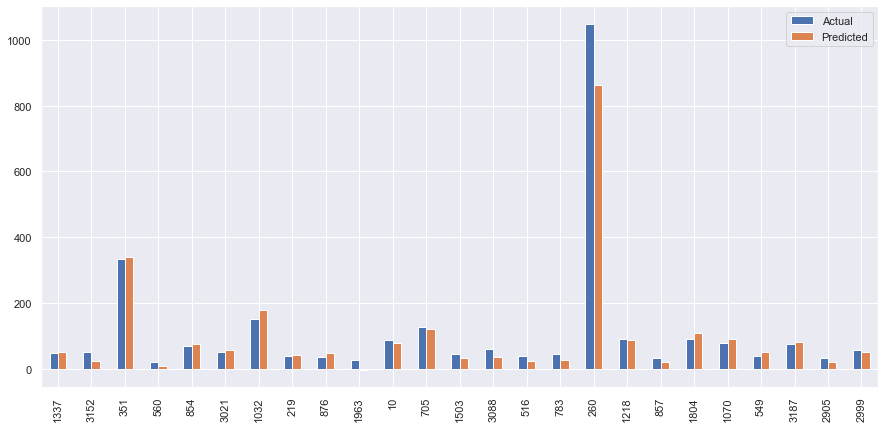

<IPython.core.display.Javascript object>

In [92]:
# plot to show the predicted value vs the acutal value of a random sample from the dataset
df3 = df_pred_test.sample(25, random_state=1)
df3.plot(kind="bar", figsize=(15, 7))
plt.show()

In [93]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train6, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.090255,17.183308,0.948904,0.948512,29.246728


<IPython.core.display.Javascript object>

In [94]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test6, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,28.095077,17.353493,0.939108,0.938007,29.726996


<IPython.core.display.Javascript object>

* The model is able to explain ~93,8% of the variation in the data, which is very good.

* The train and test RMSE and MAE are somewhat high and comparable. So, the model does suffer there

* The MAPE on the test set suggests we can predict within 29.7% of the used price

* Hence, we can conclude the model *olsmod2* may be good for prediction as well as inference purposes but could be better

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [95]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,27.260404,28.090255
MAE,16.620577,17.183308
R-squared,0.951878,0.948904
Adj. R-squared,0.950855,0.948512
MAPE,27.945701,29.246728


<IPython.core.display.Javascript object>

In [96]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,28.181883,28.095077
MAE,17.214297,17.353493
R-squared,0.938731,0.939108
Adj. R-squared,0.935601,0.938007
MAPE,29.017818,29.726996


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other

### Creating a dataset with no missing values or extreme outliers

In [97]:
# making a copy of the df2 dataset
df4 = df2.copy()

<IPython.core.display.Javascript object>

### Some more data preprocessing

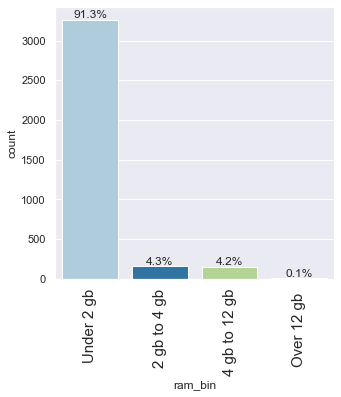

<IPython.core.display.Javascript object>

In [98]:
# binning ram so that we can see which amount of ram is most prominent in the used phones
binned_ss3 = pd.cut(df4["ram"], [-np.inf, 2, 4, 12, np.inf])
binned_ss3

binned_ss3.value_counts(dropna=False)

# can add custom labels
df4["ram_bin"] = pd.cut(
    df4["ram"],
    [-np.inf, 4, 7, 15, np.inf],
    labels=["Under 2 gb", "2 gb to 4 gb", "4 gb to 12 gb", "Over 12 gb "],
)
df4.drop(["ram"], axis=1, inplace=True)
df4["ram_bin"].value_counts(dropna=False)

labeled_barplot(df4, "ram_bin", perc=True)

* most of the phones in the dataset have ram under 2 GB 

In [99]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
df4["ram_bin"] = (
    df4["ram_bin"].astype(str).replace("nan", "is_missing").astype("category")
)

<IPython.core.display.Javascript object>

In [100]:
# checking for the outliers in the weight variable
quartiles = np.quantile(df4["weight"][df4["weight"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df4.loc[
    np.abs(df4["weight"] - df4["weight"].median()) > power_4iqr, "weight"
]
outlier_powers

Q1 = 140.0, Q3 = 184.0, 4*IQR = 176.0


3       480.0
22      453.6
34      450.0
37      460.0
41      460.0
        ...  
3048    485.0
3107    360.0
3150    338.0
3151    480.0
3162    469.0
Name: weight, Length: 212, dtype: float64

<IPython.core.display.Javascript object>

In [101]:
# checking for the outliers in the new price variable
quartiles = np.quantile(df4["new_price"][df4["new_price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df4.loc[
    np.abs(df4["new_price"] - df4["new_price"].median()) > power_4iqr, "new_price"
]
outlier_powers

Q1 = 120.13, Q3 = 291.5, 4*IQR = 685.48


35      1399.9900
45      1699.3600
85      1100.1200
111     1200.8500
137      880.8000
141      900.8700
204     2498.2400
260     1398.4700
270     1701.5400
310     1100.3100
336     1197.4900
362      879.7600
366      900.5800
377      880.7100
379     1020.0400
382     1100.6200
401      999.5800
407      879.7200
666     1100.8600
667      879.1000
668     1250.3200
669     1150.3200
674      999.0000
677     1451.9200
680      900.6300
683     1499.0700
684     1449.8200
740      949.2700
853     1000.4900
974      899.9500
1044     899.4100
1086    1149.6400
1306     880.8300
1313    2300.8700
1325    1600.2900
1327     879.9300
1341    1300.2400
1354    1199.6300
1381     921.5200
1696     951.5200
2225    1352.4200
2445    1050.7600
2448    1751.1800
2779     999.7400
2785     898.4000
3320    2560.2000
3326     917.1500
3366     934.9915
3387     934.1500
3463    2560.2000
3469     917.1500
3509     934.9915
3536     890.8000
3537    1054.4505
3542     918.0000
3552    15

<IPython.core.display.Javascript object>

In [102]:
# checking for the outliers in the used price variable
quartiles = np.quantile(df4["used_price"][df4["used_price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df4.loc[
    np.abs(df4["used_price"] - df4["used_price"].median()) > power_4iqr, "used_price"
]
outlier_powers

Q1 = 45.2, Q3 = 125.75, 4*IQR = 322.2


35      1049.97
37       413.14
45      1185.73
47       418.28
80       565.13
         ...   
3562     592.09
3563     535.75
3564     401.39
3565     756.99
3566     490.96
Name: used_price, Length: 120, dtype: float64

<IPython.core.display.Javascript object>

In [103]:
# dropping all the rows that were deemed outliers in the 3 variables above
df4.drop(outlier_powers.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

* above where the rows from used price, new price and weight that were extreme outliers in the dataset, we will now drop these in order to create a model with no outliers

### Data Overview

In [104]:
# checking the data types and the non-null values
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3449 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   brand_name       3449 non-null   object  
 1   os               3449 non-null   object  
 2   4g               3449 non-null   object  
 3   5g               3449 non-null   object  
 4   main_camera_mp   3449 non-null   float64 
 5   int_memory       3449 non-null   float64 
 6   battery          3449 non-null   float64 
 7   weight           3449 non-null   float64 
 8   release_year     3449 non-null   int64   
 9   days_used        3449 non-null   int64   
 10  new_price        3449 non-null   float64 
 11  used_price       3449 non-null   float64 
 12  screen_size_bin  3449 non-null   category
 13  selfie_cam_bin   3449 non-null   category
 14  ram_bin          3449 non-null   category
dtypes: category(3), float64(6), int64(2), object(4)
memory usage: 361.0+ KB


<IPython.core.display.Javascript object>

In [105]:
# checking the amount of rows and columns in the dataset
df4.shape

(3449, 15)

<IPython.core.display.Javascript object>

* after dropping outliers and missing value rows there are now only 3449 rows and still 15 columns

In [106]:
# chcking for missing variables
df4.isnull().sum()

brand_name         0
os                 0
4g                 0
5g                 0
main_camera_mp     0
int_memory         0
battery            0
weight             0
release_year       0
days_used          0
new_price          0
used_price         0
screen_size_bin    0
selfie_cam_bin     0
ram_bin            0
dtype: int64

<IPython.core.display.Javascript object>

* there is no missing values

### EDA for the dataset with no missing values and no outliers

In [107]:
df4.describe()

,main_camera_mp,int_memory,battery,weight,release_year,days_used,new_price,used_price
count,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000,3449.000000
mean,9.291661,49.516560,3023.047550,177.978240,2015.856190,687.737025,212.850219,92.974079
std,4.707077,74.743043,1338.554852,89.247729,2.246205,242.202251,131.462418,69.345183
min,0.080000,0.005000,80.000000,25.000000,2013.000000,91.000000,9.130000,2.510000
25%,5.000000,16.000000,2070.000000,140.000000,2014.000000,554.000000,119.550000,44.940000
50%,8.000000,32.000000,3000.000000,158.000000,2015.000000,700.000000,181.080000,74.780000
75%,13.000000,64.000000,4000.000000,181.000000,2018.000000,878.000000,279.300000,120.040000
max,48.000000,1024.000000,9600.000000,950.000000,2020.000000,1094.000000,921.520000,391.590000


<IPython.core.display.Javascript object>

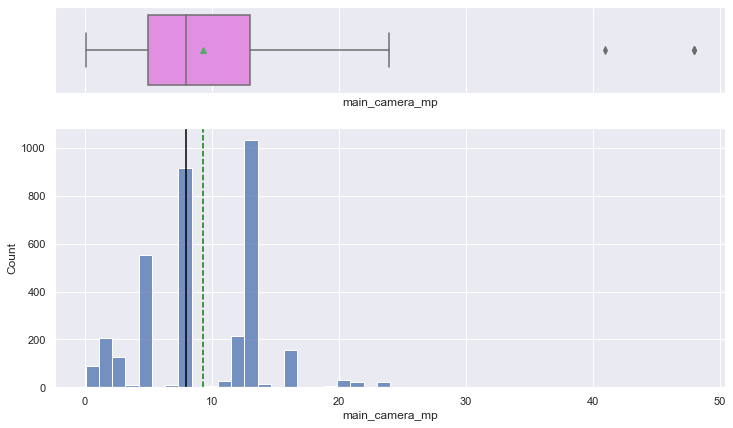

<IPython.core.display.Javascript object>

In [108]:
# created a histogram and boxplot for the main camera mp variable
histogram_boxplot(df4, "main_camera_mp")

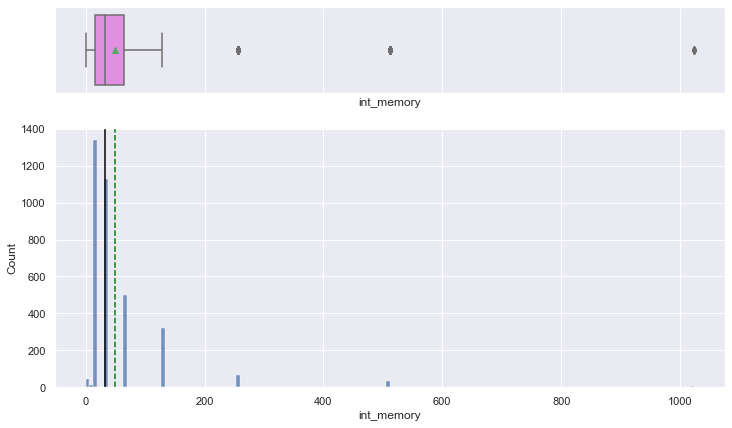

<IPython.core.display.Javascript object>

In [109]:
# created a histogram and boxplot for the int memory variable
histogram_boxplot(df4, "int_memory")

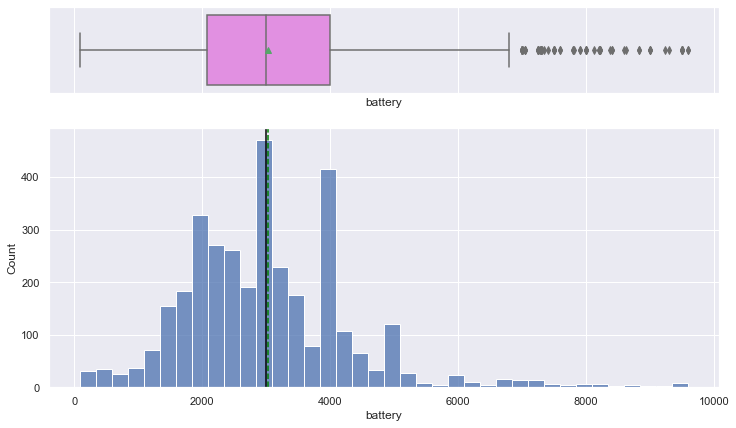

<IPython.core.display.Javascript object>

In [110]:
# created a histogram and boxplot for the battery variable
histogram_boxplot(df4, "battery")

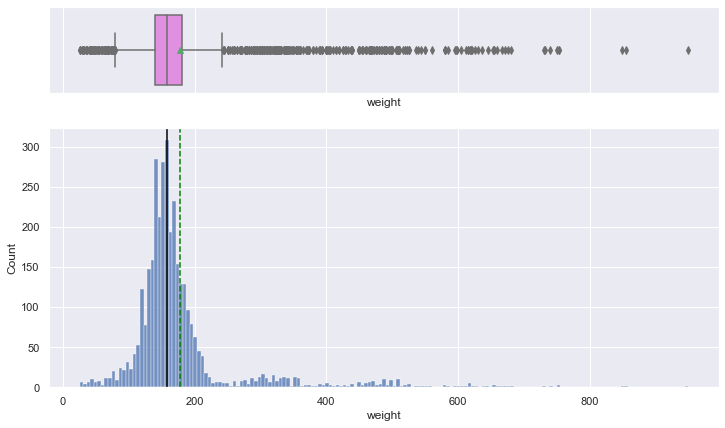

<IPython.core.display.Javascript object>

In [111]:
# created a histogram and boxplot for the weight variable
histogram_boxplot(df4, "weight")

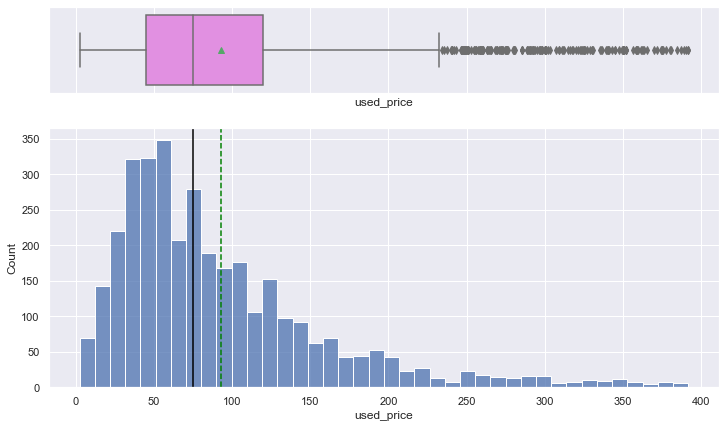

<IPython.core.display.Javascript object>

In [112]:
# created a histogram and boxplot for the used price variable
histogram_boxplot(df4, "used_price")

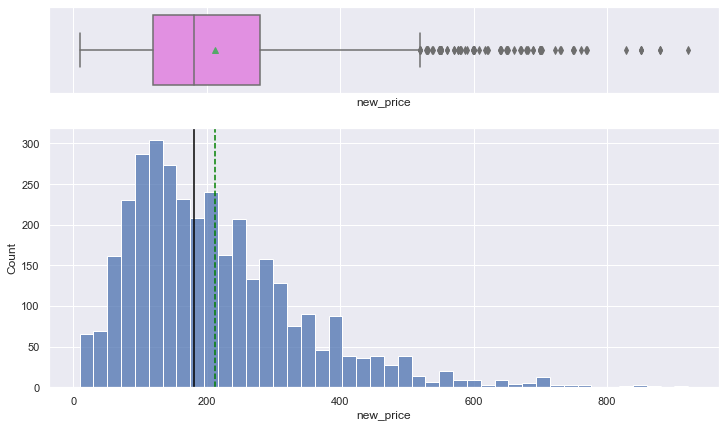

<IPython.core.display.Javascript object>

In [113]:
histogram_boxplot(df4, "new_price")

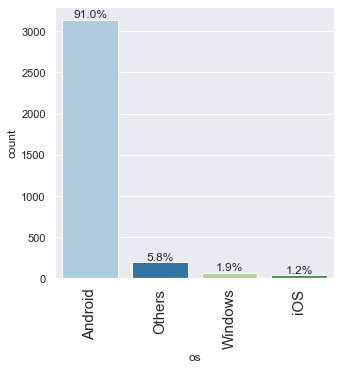

<IPython.core.display.Javascript object>

In [114]:
# created a barplot to check which os was the most present
labeled_barplot(df4, "os", perc=True)

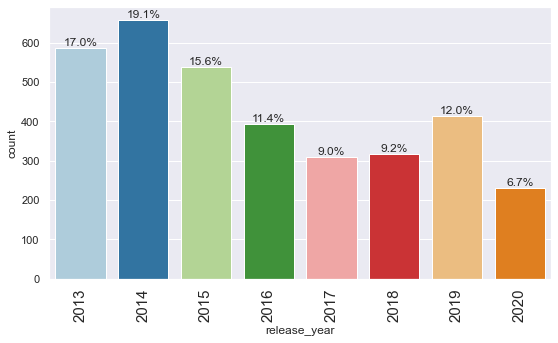

<IPython.core.display.Javascript object>

In [115]:
# created a barplot to check which release year was the most presents
labeled_barplot(df4, "release_year", perc=True)

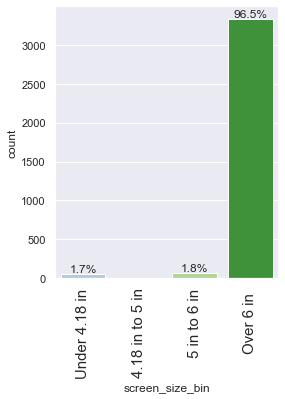

<IPython.core.display.Javascript object>

In [116]:
# created a barplot to check which screen size is the most present
labeled_barplot(df4, "screen_size_bin", perc=True)

In [117]:
# created a contingency table to check the distribution of screen size by brand
cont_table2 = pd.crosstab(df4["screen_size_bin"], df4["brand_name"])
cont_table2.head()

brand_name,Acer,Alcatel,Apple,Asus,BlackBerry,Celkon,Coolpad,Gionee,Google,HTC,...,Others,Panasonic,Realme,Samsung,Sony,Spice,Vivo,XOLO,Xiaomi,ZTE
screen_size_bin,,,,,,,,,,,,,,,,,,,,,
Under 4.18 in,0,2,5,0,0,3,0,0,0,0,...,6,0,0,15,2,0,0,0,0,1
5 in to 6 in,0,5,0,0,0,3,0,0,0,0,...,17,0,0,7,0,0,0,0,0,0
Over 6 in,51,118,38,122,22,31,22,55,13,109,...,480,47,41,325,83,30,112,49,130,138


<IPython.core.display.Javascript object>

In [118]:
# checking the amount of unique brand names
df4["brand_name"].nunique()

34

<IPython.core.display.Javascript object>

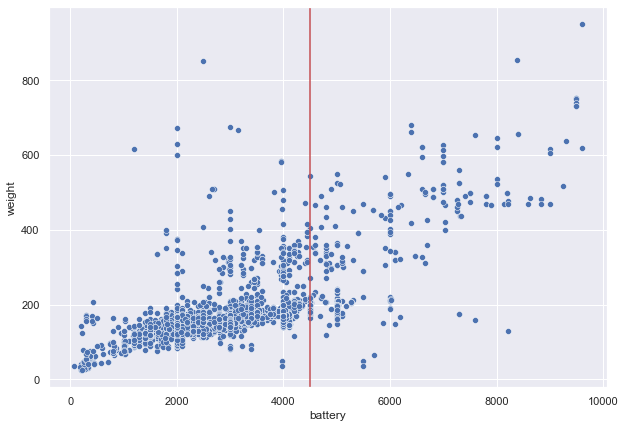

<IPython.core.display.Javascript object>

In [119]:
# created a scatterplot to compare battery size to weight
plt.figure(figsize=(10, 7))
sns.scatterplot(y="weight", x="battery", data=df4)
battery = 4500
plt.axvline(x=battery, c="r")
plt.show()

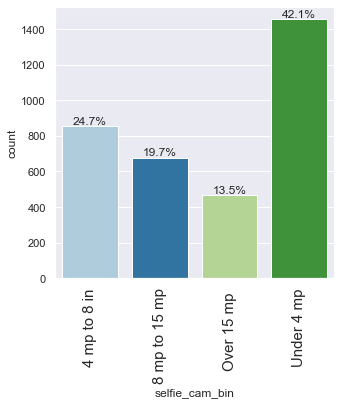

<IPython.core.display.Javascript object>

In [120]:
# created a barplot to check which selfie cam size was the most present
labeled_barplot(df4, "selfie_cam_bin", perc=True)

* even with missing values and outliers gone a mojority of the eda stayed the same the dataset is still dominated by android phones over 6 inches with under 4 mp of selfie cam quaility, the distribuitons of the numerical data roughly stayed the same with just the means getting smaller since the outliers where mostly larger values

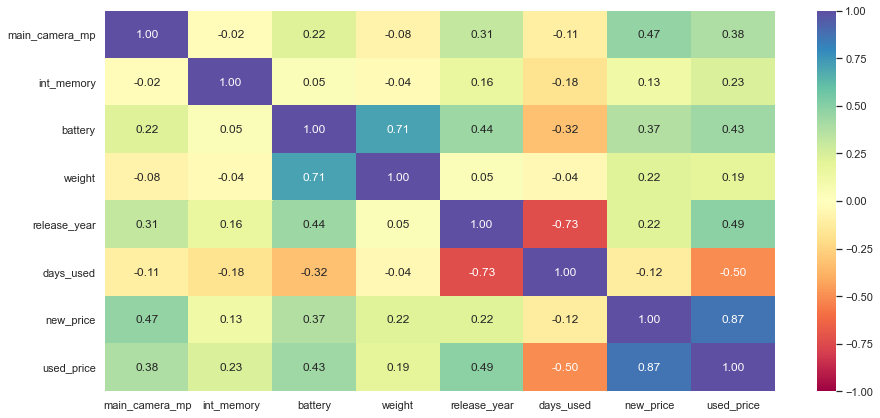

<IPython.core.display.Javascript object>

In [121]:
# created a heatmap to check correlation of all the variables
numeric_columns = df4.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df4[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

* the most correlated variables to the dependent variable are battery size, days used, and new price

### Creating a linear model without outliers and no missing values

In [122]:
# defining X and y variables
X = df4.drop(["used_price"], axis=1)
y = df4["used_price"]

print(X.head())
print(y.head())

  brand_name       os   4g   5g  main_camera_mp  int_memory  battery  weight  \
0      Honor  Android  yes   no            13.0        64.0   3020.0   146.0   
1      Honor  Android  yes  yes            13.0       128.0   4300.0   213.0   
2      Honor  Android  yes  yes            13.0       128.0   4200.0   213.0   
3      Honor  Android  yes  yes            13.0        64.0   7250.0   480.0   
4      Honor  Android  yes   no            13.0        64.0   5000.0   185.0   

   release_year  days_used  new_price screen_size_bin selfie_cam_bin  \
0          2020        127     111.62      Over 6 in    4 mp to 8 in   
1          2020        325     249.39      Over 6 in     Over 15 mp    
2          2020        162     359.47      Over 6 in   8 mp to 15 mp   
3          2020        345     278.93      Over 6 in   8 mp to 15 mp   
4          2020        293     140.87      Over 6 in   8 mp to 15 mp   

         ram_bin  
0     Under 2 gb  
1  4 gb to 12 gb  
2  4 gb to 12 gb  
3   2 gb t

<IPython.core.display.Javascript object>

In [123]:
# created dummy variables for the oject and catergory variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,main_camera_mp,int_memory,battery,weight,release_year,days_used,new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,...,5g_yes,screen_size_bin_4.18 in to 5 in,screen_size_bin_5 in to 6 in,screen_size_bin_Over 6 in,selfie_cam_bin_8 mp to 15 mp,selfie_cam_bin_Over 15 mp,selfie_cam_bin_Under 4 mp,ram_bin_4 gb to 12 gb,ram_bin_Over 12 gb,ram_bin_Under 2 gb
0,13.0,64.0,3020.0,146.0,2020,127,111.62,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,13.0,128.0,4300.0,213.0,2020,325,249.39,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,13.0,128.0,4200.0,213.0,2020,162,359.47,0,0,0,...,1,0,0,1,1,0,0,1,0,0
3,13.0,64.0,7250.0,480.0,2020,345,278.93,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4,13.0,64.0,5000.0,185.0,2020,293,140.87,0,0,0,...,0,0,0,1,1,0,0,0,0,1


<IPython.core.display.Javascript object>

* creating dummy variables for all catergorical variables like brand name, selfie cam bin, and now ram bin

In [124]:
# splitting the data in 70:30 ratio for train to test data

x_train7, x_test7, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [125]:
print("Number of rows in train data =", x_train7.shape[0])
print("Number of rows in test data =", x_test7.shape[0])

Number of rows in train data = 2414
Number of rows in test data = 1035


<IPython.core.display.Javascript object>

In [126]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train7, y_train1)

LinearRegression()

<IPython.core.display.Javascript object>

In [127]:
# printing the coefficents of each variables
coef_df1 = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train7.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df1

,Coefficients
main_camera_mp,-5.495689e-01
int_memory,2.867782e-02
battery,3.540682e-04
weight,-1.224529e-02
release_year,9.971640e-01
days_used,-9.375258e-02
new_price,4.184039e-01
brand_name_Alcatel,-9.059504e-02
brand_name_Apple,4.566918e+01
brand_name_Asus,-1.453405e+00


<IPython.core.display.Javascript object>

In [128]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train7, y_train1
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,16.508332,11.420313,0.944918,0.943657,20.785294


<IPython.core.display.Javascript object>

In [129]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_train7, y_train1
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,16.508332,11.420313,0.944918,0.943657,20.785294


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 94.5%, indicating that the model explains 94.5% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used price within a mean error of 16 euros on the test data.

- MAPE on the test set suggests we can predict within 20.8% of the used price.

In [130]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train8 = sm.add_constant(x_train7)
# adding constant to the test data
x_test8 = sm.add_constant(x_test7)

olsmod3 = sm.OLS(y_train1, x_train8).fit()
print(olsmod3.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     763.9
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:09:02   Log-Likelihood:                -10194.
No. Observations:                2414   AIC:                         2.050e+04
Df Residuals:                    2360   BIC:                         2.081e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

<IPython.core.display.Javascript object>

### Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

In [131]:
# checking for high vif scores
checking_vif(x_train8)

,feature,VIF
0,const,4.186409e+06
1,main_camera_mp,2.349192e+00
2,int_memory,1.333647e+00
3,battery,4.096350e+00
4,weight,3.130437e+00
5,release_year,5.216657e+00
6,days_used,2.446306e+00
7,new_price,2.232578e+00
8,brand_name_Alcatel,3.357246e+00
9,brand_name_Apple,3.363416e+01


<IPython.core.display.Javascript object>

In [132]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [133]:
# checking to see the impact dropping one of these variables would have on the model
col_list = [
    "release_year",
    "brand_name_Huawei",
    "brand_name_Others",
    "brand_name_Samsung",
    "brand_name_Apple",
    "os_iOS",
    "screen_size_bin_4.18 in to 5 in",
    "screen_size_bin_5 in to 6 in",
    "screen_size_bin_Over 6 in",
]

res = treating_multicollinearity(x_train8, y_train1, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.943705,16.692597
1,screen_size_bin_5 in to 6 in,0.943705,16.692599
2,brand_name_Samsung,0.943702,16.693105
3,brand_name_Huawei,0.943694,16.694276
4,screen_size_bin_Over 6 in,0.943682,16.696027
5,screen_size_bin_4.18 in to 5 in,0.943681,16.696130
6,brand_name_Apple,0.943537,16.717417
7,release_year,0.943505,16.722234
8,os_iOS,0.943490,16.724407


<IPython.core.display.Javascript object>

In [134]:
# dropping this variable to check the impact it had the on the other variables vif score
col_to_drop = "brand_name_Others"
x_train9 = x_train8.loc[:, ~x_train8.columns.str.startswith(col_to_drop)]
x_test9 = x_test8.loc[:, ~x_test8.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train9)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,4.184699e+06
1,main_camera_mp,2.349039e+00
2,int_memory,1.333144e+00
3,battery,4.094458e+00
4,weight,3.126157e+00
5,release_year,5.215262e+00
6,days_used,2.445947e+00
7,new_price,2.232508e+00
8,brand_name_Alcatel,1.229453e+00
9,brand_name_Apple,3.287208e+01


<IPython.core.display.Javascript object>

In [135]:
# checking to see the impact dropping one of these variables would have on the model
col_list = [
    "release_year",
    "brand_name_Apple",
    "os_iOS",
    "screen_size_bin_4.18 in to 5 in",
    "screen_size_bin_5 in to 6 in",
    "screen_size_bin_Over 6 in",
]

res = treating_multicollinearity(x_train9, y_train1, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size_bin_5 in to 6 in,0.943729,16.689068
1,screen_size_bin_Over 6 in,0.943706,16.692493
2,screen_size_bin_4.18 in to 5 in,0.943705,16.692597
3,brand_name_Apple,0.943558,16.714375
4,release_year,0.943529,16.718695
5,os_iOS,0.943514,16.720870


<IPython.core.display.Javascript object>

In [136]:
# dropping this variable to check the impact it had the on the other variables vif score
col_to_drop = "screen_size_bin_4.18 in to 5 in"
x_train10 = x_train9.loc[:, ~x_train9.columns.str.startswith(col_to_drop)]
x_test10 = x_test9.loc[:, ~x_test9.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train10)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size_bin_4.18 in to 5 in


,feature,VIF
0,const,4.184699e+06
1,main_camera_mp,2.349039e+00
2,int_memory,1.333144e+00
3,battery,4.094458e+00
4,weight,3.126157e+00
5,release_year,5.215262e+00
6,days_used,2.445947e+00
7,new_price,2.232508e+00
8,brand_name_Alcatel,1.229453e+00
9,brand_name_Apple,3.287208e+01


<IPython.core.display.Javascript object>

In [137]:
# checking to see the impact dropping one of these variables would have on the model
col_list = ["brand_name_Apple", "os_iOS", "release_year"]

res = treating_multicollinearity(x_train10, y_train1, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.943558,16.714375
1,release_year,0.943529,16.718695
2,os_iOS,0.943514,16.720870


<IPython.core.display.Javascript object>

In [138]:
# dropping this variable to check the impact it had the on the other variables vif score
col_to_drop = "brand_name_Apple"
x_train11 = x_train10.loc[:, ~x_train10.columns.str.startswith(col_to_drop)]
x_test11 = x_test10.loc[:, ~x_test10.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train11)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,4.178348e+06
1,main_camera_mp,2.347847e+00
2,int_memory,1.333086e+00
3,battery,4.070147e+00
4,weight,3.124827e+00
5,release_year,5.207449e+00
6,days_used,2.445523e+00
7,new_price,2.230116e+00
8,brand_name_Alcatel,1.228536e+00
9,brand_name_Asus,1.215887e+00


<IPython.core.display.Javascript object>

In [139]:
# dropping this variable to check the impact it had the on the other variables vif score
col_to_drop = "release_year"
x_train12 = x_train11.loc[:, ~x_train11.columns.str.startswith(col_to_drop)]
x_test12 = x_test11.loc[:, ~x_test11.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train12)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year


,feature,VIF
0,const,149.890799
1,main_camera_mp,2.329240
2,int_memory,1.327999
3,battery,3.938400
4,weight,3.123093
5,days_used,1.806759
6,new_price,2.093344
7,brand_name_Alcatel,1.228164
8,brand_name_Asus,1.215697
9,brand_name_BlackBerry,1.150529


<IPython.core.display.Javascript object>

In [140]:
# creating a linear model with no muilticollinearity
olsmod4 = sm.OLS(y_train1, x_train12).fit()
print(olsmod4.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     804.9
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:09:08   Log-Likelihood:                -10202.
No. Observations:                2414   AIC:                         2.051e+04
Df Residuals:                    2363   BIC:                         2.080e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

In [141]:
# initial list of columns
cols = x_train12.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train12[cols]

    # fitting the model
    model = sm.OLS(y_train1, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'int_memory', 'days_used', 'new_price', 'brand_name_Gionee', 'brand_name_Google', 'brand_name_Honor', 'brand_name_Infinix', 'brand_name_LG', 'brand_name_Nokia', 'brand_name_Realme', 'brand_name_Sony', '4g_yes', '5g_yes', 'screen_size_bin_Over 6 in ', 'selfie_cam_bin_8 mp to 15 mp', 'selfie_cam_bin_Over 15 mp ', 'ram_bin_4 gb to 12 gb', 'ram_bin_Over 12 gb ', 'ram_bin_Under 2 gb']


<IPython.core.display.Javascript object>

In [142]:
# the train and test set with the variables that had a p-value less than .05
x_train13 = x_train12[selected_features]
x_test13 = x_test12[selected_features]

<IPython.core.display.Javascript object>

In [143]:
# creating a linear model with no multicollinearity and p-values less than .05
olsmod5 = sm.OLS(y_train1, x_train13).fit()
print(olsmod5.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2014.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:09:09   Log-Likelihood:                -10216.
No. Observations:                2414   AIC:                         2.047e+04
Df Residuals:                    2393   BIC:                         2.059e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

* this model has no variables that violate mulitcollinearity or variables with p-value greater than .05
* the adjusted r2 is still high so dropping these varaibles did not have a huge effect on the model

In [144]:
# created a dataframe with actual, fitted and residual values
df_pred1 = pd.DataFrame()

df_pred1["Actual Values"] = y_train1  # actual values
df_pred1["Fitted Values"] = olsmod5.fittedvalues  # predicted values
df_pred1["Residuals"] = olsmod5.resid  # residuals

df_pred1.head()

,Actual Values,Fitted Values,Residuals
1559,64.11,80.130056,-16.020056
1188,74.60,60.533624,14.066376
1667,80.14,78.987443,1.152557
2986,172.15,165.985234,6.164766
112,97.79,100.879433,-3.089433


<IPython.core.display.Javascript object>

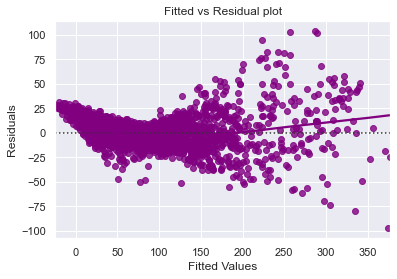

<IPython.core.display.Javascript object>

In [145]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred1, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

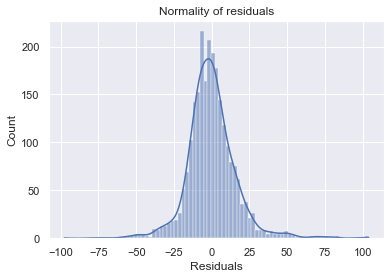

<IPython.core.display.Javascript object>

In [146]:
# plot a histogram to check for normality
sns.histplot(data=df_pred1, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

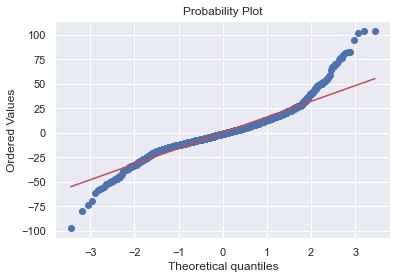

<IPython.core.display.Javascript object>

In [147]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred1["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [148]:
# run a shapiro test
stats.shapiro(df_pred1["Residuals"])

ShapiroResult(statistic=0.9229761362075806, pvalue=1.7724540958660163e-33)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

In [149]:
# runa goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred1["Residuals"], x_train13)
lzip(name, test)

[('F statistic', 1.024953027956367), ('p-value', 0.3356726093063081)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

**Now that we have checked all the assumptions of linear regression and they are satisfied, we can move towards the prediction part.**

In [150]:
# predictions on the test set
pred = olsmod5.predict(x_test13)

df_pred_test1 = pd.DataFrame({"Actual": y_test1, "Predicted": pred})
df_pred_test1.sample(10, random_state=1)

,Actual,Predicted
474,51.09,42.940168
1231,94.75,84.072523
185,149.25,140.331563
1546,139.94,139.205829
42,147.94,156.684099
1081,144.57,151.577241
2611,60.08,74.056719
3429,44.20,55.502767
2317,59.90,52.105123
330,14.74,5.050629


<IPython.core.display.Javascript object>

* this model so far is showing closer predictions than the previous model that included outliers

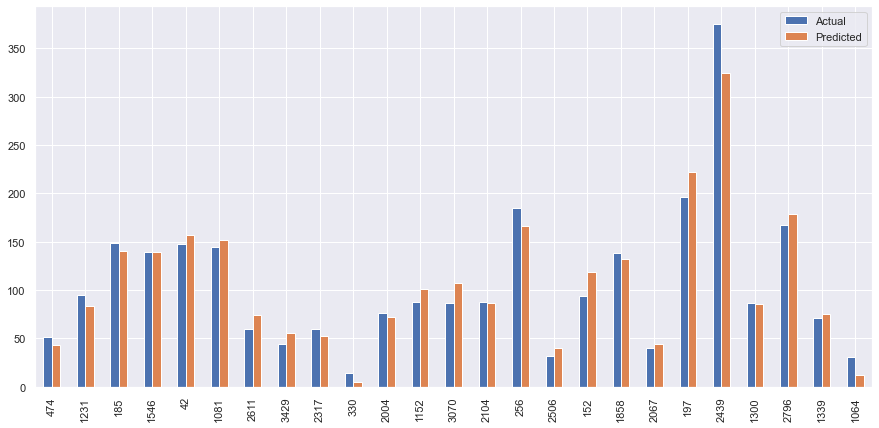

<IPython.core.display.Javascript object>

In [151]:
# created a barplot to compare the predicted values to the actual values
df7 = df_pred_test1.sample(25, random_state=1)
df7.plot(kind="bar", figsize=(15, 7))
plt.show()

In [152]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod5_train_perf = model_performance_regression(olsmod5, x_train13, y_train1)
olsmod5_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,16.657834,11.526969,0.943916,0.943424,20.926409


<IPython.core.display.Javascript object>

In [153]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod5_test_perf = model_performance_regression(olsmod5, x_test13, y_test1)
olsmod5_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,15.952156,11.23148,0.942932,0.941749,22.408247


<IPython.core.display.Javascript object>

* The model is able to explain ~94% of the variation in the data, which is very good.

* The train and test RMSE and MAE are lower in this model with no outliers, than the previous model with outliers included and comparable. So, this model currently is better.

* The MAPE on the test set suggests we can predict within 22% of the used price. 

* Hence, we can conclude the model *olsmod5* is good and better than olsmod2 for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [154]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod5_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,16.508332,16.657834
MAE,11.420313,11.526969
R-squared,0.944918,0.943916
Adj. R-squared,0.943657,0.943424
MAPE,20.785294,20.926409


<IPython.core.display.Javascript object>

In [155]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod5_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,16.508332,15.952156
MAE,11.420313,11.231480
R-squared,0.944918,0.942932
Adj. R-squared,0.943657,0.941749
MAPE,20.785294,22.408247


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

### Comparing the two models 

In [156]:
# training performance comparison

models_train_comp_df3 = pd.concat([olsmod2_train_perf.T, olsmod5_train_perf.T], axis=1,)

models_train_comp_df3.columns = [
    "Linear Regression statsmodels with outliers",
    "Linear Regression statsmodels without outliers",
]

print("Training performance comparison:")
models_train_comp_df3

Training performance comparison:


,Linear Regression statsmodels with outliers,Linear Regression statsmodels without outliers
RMSE,28.090255,16.657834
MAE,17.183308,11.526969
R-squared,0.948904,0.943916
Adj. R-squared,0.948512,0.943424
MAPE,29.246728,20.926409


<IPython.core.display.Javascript object>

In [157]:
# test performance comparison

models_test_comp_df3 = pd.concat([olsmod2_test_perf.T, olsmod5_test_perf.T], axis=1,)

models_test_comp_df3.columns = [
    "Linear Regression statsmodels with outliers",
    "Linear Regression statsmodels without outliers",
]

print("Test performance comparison:")
models_test_comp_df3

Test performance comparison:


,Linear Regression statsmodels with outliers,Linear Regression statsmodels without outliers
RMSE,28.095077,15.952156
MAE,17.353493,11.231480
R-squared,0.939108,0.942932
Adj. R-squared,0.938007,0.941749
MAPE,29.726996,22.408247


<IPython.core.display.Javascript object>

* here we can see that the model without the outliers perfomrs a lot better than the model with the outliers, for that reason we will be procceding with this model as our final model for us to draw insights from and create reccomendations with

### Final Model

In [158]:
# recreating the final linear model that has no missing values or extreme outliers
olsmod5 = sm.OLS(y_train1, x_train13).fit()
print(olsmod5.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2014.
Date:                Sat, 23 Oct 2021   Prob (F-statistic):               0.00
Time:                        02:09:22   Log-Likelihood:                -10216.
No. Observations:                2414   AIC:                         2.047e+04
Df Residuals:                    2393   BIC:                         2.059e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<IPython.core.display.Javascript object>

### Actionable Insights 

1. More notable brands like Google and Sony have positive impacts on the used price while less notable brands like infinix and realme have negative impacts on the used price.

2. Surprisingly main camera has a negative coefficient meaning that as the quality of the main camera goes up the used price goes down.

3. Days used has a negative coefficient meaning that when days used increase the used price decreases which makes sense as older more used phones would be less expensive.

4. New price has a positive coefficent meaning that the more expensive the phone was new the more expensive the phone would be used.

5. 5G phones are also going to increase the price of a used phone since that variable also has a positive coefficient.

6. screen size bin over 6 inches also has a positive coefficent meaning the larger the screen size the higher the used price. 

7. Selfie camera bin over 15 mp has a positive coefficient meaning that phones with higher quality selfie cameras have a higher used price (increase the used price).

8. Similarly phones with more ram also increase the used price

### Reccomendations

1. Using the linear regression model we can see that factors like brand type, 5G, screen size over 6 inches, selfie camera over 15 mp and ram between 4 and 12 GB all have positive coeffiecients and are important factors in determining the price of the phone.

2. Using this model we can effectively price used phones in order to maximize sales and profit. 

3. This model can also help us in determining what phones to purchase when it comes to obtaining used phones to sell. Since we know what features lead to a higher used price selling point we will try to obtain as many phones as possible that are similar.

4. Buy used phones that satisfy as many variables as possible that a have a positive impact on the used price of a phone from the model.
